## Homework 5 STA4364

Emily 

### **Problem 1**


In [1]:
#Loading Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import neighbors
import sklearn.linear_model as skl 
from sklearn.model_selection import train_test_split,cross_validate,GridSearchCV
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as skm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC, LinearSVC
import statsmodels.api as sm
import statsmodels.formula.api as smf

#### **Part a**: Loading and preparing data 

In [2]:
#Loading the data
magic=pd.read_table("/Users/admin/Documents/Csvv/magic04.data",header=None,sep=",")
magic.head()

,0,1,2,3,4,5,6,7,8,9,10
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [3]:
#Column names 
magic.columns=["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
magic.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [4]:
magic["class"]=magic["class"].factorize()[0]

In [5]:
magic.head()
#Where g is 0 and h is 1. 

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,0
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,0
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,0
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,0
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,0


In [6]:
#Partitioning the data 
magic_train, magic_test = train_test_split(magic, test_size=int(0.3*magic.shape[0]))

In [7]:
magic_train.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
3284,56.8518,19.6101,2.9398,0.2723,0.1706,-80.6783,15.7759,14.3358,7.6682,251.852,0
18566,100.2960,41.6470,3.2072,0.1049,0.0524,91.7623,86.6277,37.7065,88.1303,111.458,1
8967,41.8157,21.1334,2.8132,0.2706,0.1668,27.7430,32.2557,14.2121,34.2159,148.826,0
2900,38.4181,17.1406,2.5971,0.4020,0.2162,16.0802,39.5951,-13.8313,0.3930,261.014,0
9188,36.1806,17.9444,2.6015,0.2803,0.1414,21.7259,14.4420,-10.2895,8.2714,179.442,0


In [8]:
#Scaling Data 
ss=StandardScaler()
scale=ss.fit_transform(magic_train[magic_train.columns[0:10]])
scaleTest=ss.fit_transform(magic_test[magic_test.columns[0:10]])

In [9]:
scale.mean()

-6.131993415865669e-17

In [10]:
scale.std()

1.0

In [11]:
#New scaled Dataset
MagicTrainScaled=pd.DataFrame(scale)

In [12]:
MagicTrainScaled.columns=["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist"]
MagicTrainScaled.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
0,0.084525,-0.135065,0.243339,-0.593907,-0.402258,-1.283172,0.106099,0.686410,-0.761827,0.778661
1,1.110206,1.076132,0.808542,-1.506292,-1.469507,1.621839,1.496595,1.821215,2.320255,-1.100355
2,-0.270465,-0.051341,-0.024255,-0.603173,-0.436569,0.543341,0.429522,0.680403,0.255076,-0.600226
3,-0.350680,-0.270794,-0.481025,0.113000,0.009473,0.346865,0.573560,-0.681293,-1.040502,0.901284
4,-0.403505,-0.226615,-0.471725,-0.550305,-0.665910,0.441975,0.079920,-0.509315,-0.738721,-0.190466


In [13]:
x=magic_train[magic_train.columns[-1]]
tempResp=np.array(x)

In [14]:
MagicTrainScaled["classy"]=tempResp

In [15]:
MagicTrainScaled

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,classy
0,0.084525,-0.135065,0.243339,-0.593907,-0.402258,-1.283172,0.106099,0.686410,-0.761827,0.778661,0
1,1.110206,1.076132,0.808542,-1.506292,-1.469507,1.621839,1.496595,1.821215,2.320255,-1.100355,1
2,-0.270465,-0.051341,-0.024255,-0.603173,-0.436569,0.543341,0.429522,0.680403,0.255076,-0.600226,0
3,-0.350680,-0.270794,-0.481025,0.113000,0.009473,0.346865,0.573560,-0.681293,-1.040502,0.901284,0
4,-0.403505,-0.226615,-0.471725,-0.550305,-0.665910,0.441975,0.079920,-0.509315,-0.738721,-0.190466,0
...,...,...,...,...,...,...,...,...,...,...,...
13309,-0.778730,-0.703110,-1.272394,1.283730,1.220286,-0.325042,-0.413657,-0.133646,-0.603406,0.281383,0
13310,-0.699356,-0.503004,-0.689859,0.655853,1.224801,0.006004,-0.595129,0.441975,0.363215,-0.853677,0
13311,-0.826041,-0.632423,-1.414857,0.970881,0.740837,0.473894,-0.022418,0.168693,-0.024977,0.498884,0
13312,-0.464360,0.064739,-0.198424,-0.801565,-0.877193,-0.487031,-0.076147,-0.810337,-1.005346,-1.290115,0


In [16]:
#Test df 
MagicTestScaled=pd.DataFrame(scaleTest)
MagicTestScaled.columns=["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist"]
x1=magic_test[magic_test.columns[-1]]
tempResp1=np.array(x1)
MagicTestScaled["classy"]=tempResp1


#### **Part b/c**: Modeling Data and Fitting Testing Data
**Logistic Regression**

In [17]:
#Logistic Regression using statsmodels.api
logit_train_fit = smf.logit(formula="classy~fLength + fWidth+ fSize + fConc + fConc1 + fAsym + fM3Long + fM3Trans + fAlpha + fDist",data=MagicTrainScaled).fit()
logit_train_fit.summary2().tables[1]

Optimization terminated successfully.
         Current function value: 0.455059
         Iterations 7


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
Intercept,-0.649728,0.023792,-27.308994,3.316874e-164,-0.696359,-0.603097
fLength,1.271291,0.053680,23.682739,5.431284e-124,1.166080,1.376503
fWidth,0.078551,0.054410,1.443686,1.488273e-01,-0.028091,0.185194
fSize,0.332451,0.054717,6.075867,1.233195e-09,0.225209,0.439694
fConc,0.069910,0.114463,0.610767,5.413537e-01,-0.154433,0.294254
fConc1,0.541920,0.100591,5.387356,7.150171e-08,0.344765,0.739075
fAsym,0.013965,0.030731,0.454411,6.495331e-01,-0.046268,0.074197
fM3Long,-0.410185,0.032682,-12.550801,3.935100e-36,-0.474240,-0.346129
fM3Trans,-0.024535,0.028617,-0.857353,3.912500e-01,-0.080624,0.031554
fAlpha,1.182847,0.026536,44.575669,0.000000e+00,1.130838,1.234856


Most meaningful predictors are fLength, fSize, fConc and fM3Long as they all have significant pvalues. 

In [18]:
#Logistic Regression using sklearn LogisticRegression
logit_tr=skl.LogisticRegression(solver='newton-cg')
x=MagicTrainScaled[MagicTrainScaled.columns[:10]]
y=MagicTrainScaled["classy"]
logit_tr.fit(x,y)
print('coefficients: ',logit_tr.coef_)
#coefficients close to the regression shown above

coefficients:  [[ 1.26746343  0.08015244  0.33187937  0.07337242  0.53744787  0.01332782
  -0.4091114  -0.02452906  1.18169872  0.04290269]]


In [19]:
#Predicting with testing data 
pred=logit_tr.predict(MagicTestScaled[MagicTestScaled.columns[:10]])

In [20]:
#Confusion matrix 
skm.confusion_matrix(MagicTestScaled["classy"],pred)

array([[3302,  384],
       [ 845, 1175]])

In [21]:
#Accuracy of 78%
print(skm.classification_report(MagicTestScaled["classy"],pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.84      3686
           1       0.75      0.58      0.66      2020

    accuracy                           0.78      5706
   macro avg       0.77      0.74      0.75      5706
weighted avg       0.78      0.78      0.78      5706



Accuracy of logistic model shown around 78% 

In [22]:
def ROC_Crv(pred):
    fpr, tpr, thresholds = skm.roc_curve(MagicTestScaled["classy"],pred)
    auc = skm.roc_auc_score(MagicTestScaled["classy"],pred)
    plt.plot(fpr,tpr,label="AUC="+str(round(auc,4)))
    plt.plot([0, 1], [0, 1], color="orange", lw=2, linestyle="--")
    plt.ylabel("True Positive Rate")
    plt.xlabel("False Positive Rate")
    plt.legend(loc=5)
    plt.show()

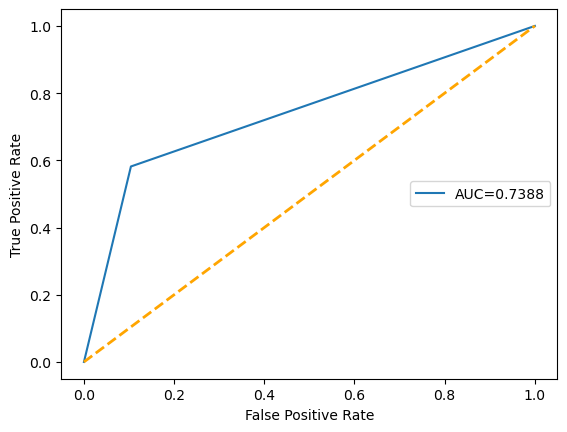

In [23]:
ROC_Crv(pred)

The AUC for this model is .739.

**Linear Discriminant Analysis**

In [24]:
lda=LinearDiscriminantAnalysis()
lda_fit=lda.fit(x,y)

In [25]:
#Predicting with testing data 
pred_lda=lda_fit.predict(MagicTestScaled[MagicTestScaled.columns[:10]])

In [26]:
#Confusion matrix 
skm.confusion_matrix(MagicTestScaled["classy"],pred_lda)

array([[3329,  357],
       [ 903, 1117]])

In [27]:
#Classification Report 
print(skm.classification_report(MagicTestScaled["classy"],pred_lda))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84      3686
           1       0.76      0.55      0.64      2020

    accuracy                           0.78      5706
   macro avg       0.77      0.73      0.74      5706
weighted avg       0.78      0.78      0.77      5706



Accuracy for the Lda model is 0.78. 

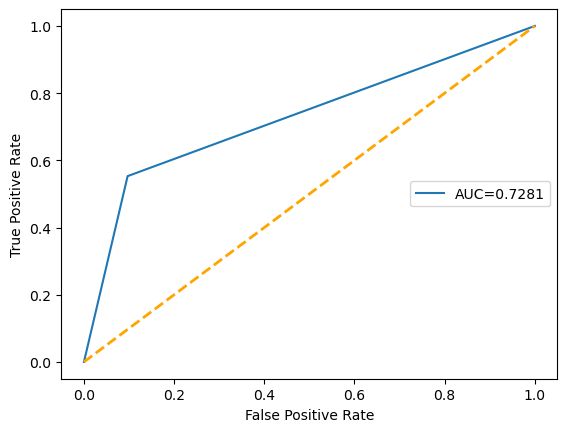

In [28]:
ROC_Crv(pred_lda)

The area under the curve is 0.73 for the lda model. 

**KNN Classifier**

In [29]:
def KnnFunc(num):
    knn=neighbors.KNeighborsClassifier(n_neighbors=num)
    knn_fit=knn.fit(x,y)
    pred_knn=knn_fit.predict(MagicTestScaled[MagicTestScaled.columns[:10]])
    accuracy=skm.accuracy_score(MagicTestScaled["classy"], pred_knn)
    ROC_Crv(pred_knn)
    print("The accuracy of the model is:", round(accuracy,4))

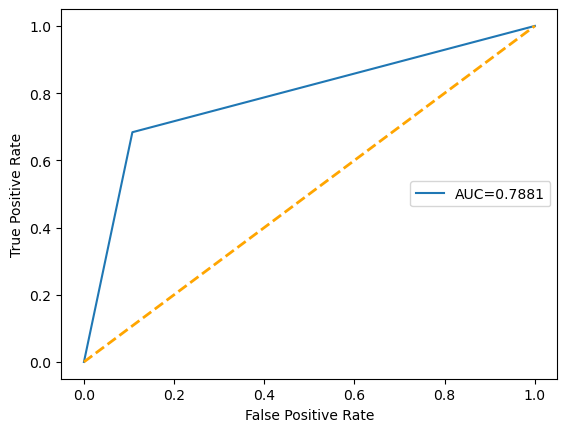

The accuracy of the model is: 0.8186
For K is 1


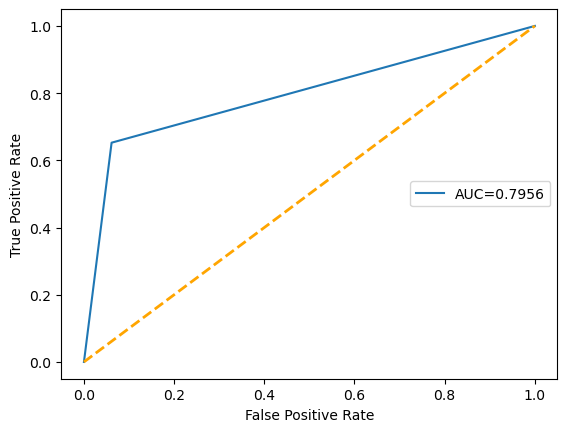

The accuracy of the model is: 0.8374
For K is 5


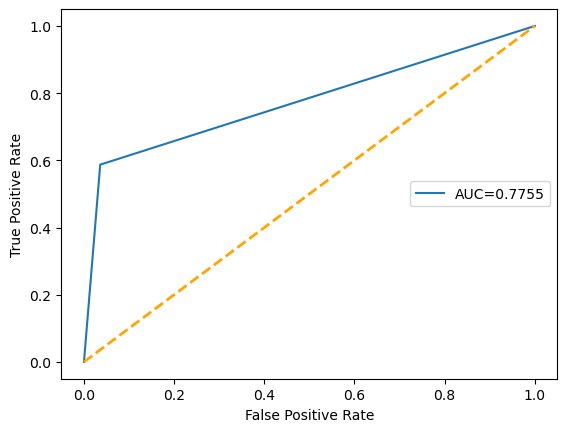

The accuracy of the model is: 0.8305
For K is 10


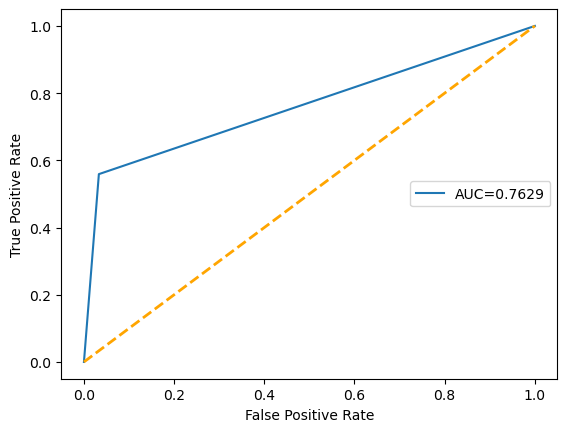

The accuracy of the model is: 0.8225
For K is 50


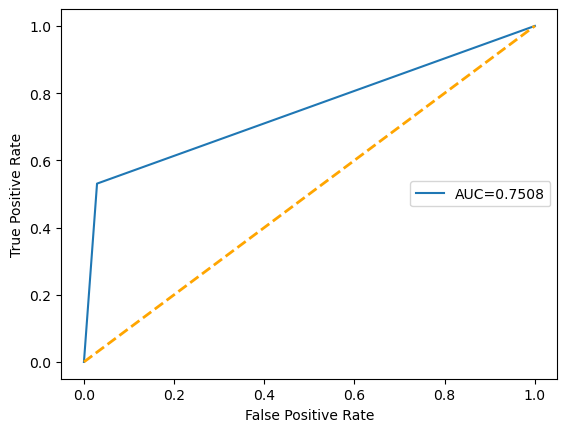

The accuracy of the model is: 0.8151
For K is 100


In [30]:
for i in [1,5,10,50,100]:
    KnnFunc(i)
    print("For K is",i)

Best value of k would be k=5 with an accuracy of 0.84 and an AUC of 0.7956

**Linear SVM**

In [31]:
params=[{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}]
cSearch=GridSearchCV(SVC(kernel='linear'),params,cv=5,scoring='accuracy', return_train_score=True)
cSearch.fit(x,y)
cSearch.best_params_

{'C': 5}

In [39]:
svm=SVC(C= 5.0, kernel='linear')
svm_fit=svm.fit(x,y)

In [40]:
pred_svm=svm_fit.predict(MagicTestScaled[MagicTestScaled.columns[:10]])
skm.accuracy_score(MagicTestScaled["classy"], pred_svm)

0.7874167542937259

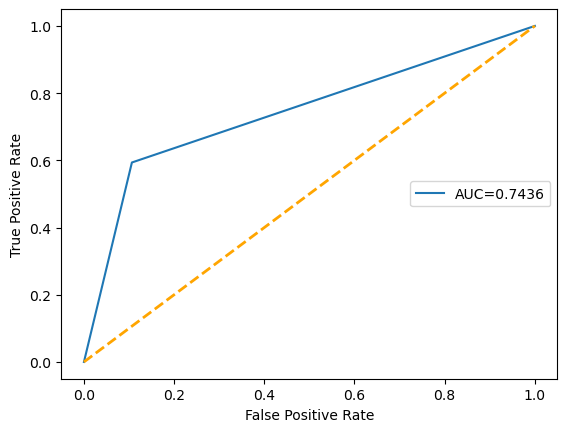

In [41]:
ROC_Crv(pred_svm)

The accuracy for this model is 0.787 with a C of 5 and an auc of 0.74. 

**Gaussian (Radial) SVM**

In [46]:
params2=[{'C': [0.01, 1, 10, 100],'gamma': [0.5, 1,2,3]}]
cSearch2=GridSearchCV(SVC(kernel='rbf'),params2,cv=5,scoring='accuracy', return_train_score=True)
cSearch2.fit(x,y)
cSearch2.best_params_

{'C': 1, 'gamma': 0.5}

In [47]:
svmR=SVC(C= 1, kernel='rbf', gamma=0.5)
svmR_fit=svmR.fit(x,y)

In [48]:
pred_svmR=svmR_fit.predict(MagicTestScaled[MagicTestScaled.columns[:10]])
skm.accuracy_score(MagicTestScaled["classy"], pred_svmR)

0.8666316158429723

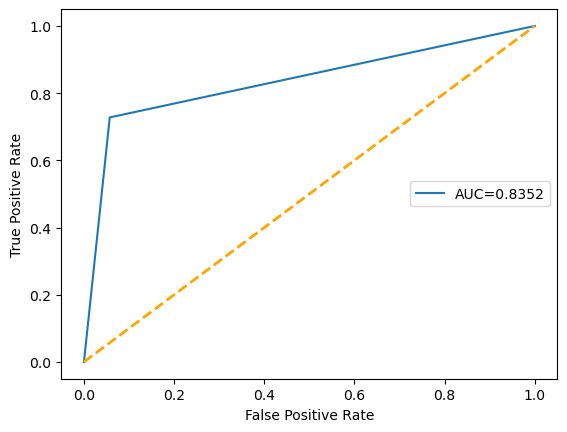

In [49]:
ROC_Crv(pred_svmR)

The accuracy for this model is 0.787 with a C of 1 and an gamma value of 0.5. With an accuracy of 0.867 and an auc of 0.835.  